In [1]:
# Importing packages and libraries
from keras.layers import Input, Dense, Flatten, Dropout, Reshape
from keras.layers import BatchNormalization, Activation, Conv2D, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.optimizers import Adam

from keras.datasets import cifar10
import keras.backend as K

import matplotlib.pyplot as plt

import sys
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_generator(input_layer):
    '''Requires input layer as input, outputs the model and final layer'''
    
    hid = Dense(128 * 16 * 16, activation = 'relu')(input_layer)
    hid = BatchNormalization(momentum = 0.9)(hid)
    hid = LeakyReLU(alpha = 0.1)(hid)
    hid = Reshape((16, 16, 128))(hid)
    
    hid = Conv2D(128, kernel_size = 5, strides = 1, padding = 'same')(hid)
    hid = BatchNormalization(momentum = 0.9)(hid)
    hid = LeakyReLU(alpha = 0.1)(hid)
    
    hid = Conv2DTranspose(128, 4, strides = 2, padding = 'same')(hid)
    hid = BatchNormalization(momentum = 0.9)(hid)
    hid = LeakyReLU(alpha = 0.1)(hid)
    
    hid = Conv2D(128, kernel_size = 5, strides = 1, padding = 'same')(hid)
    hid = BatchNormalization(momentum = 0.9)(hid)
    hid = LeakyReLU(alpha = 0.1)(hid)
    
    hid = Conv2D(128, kernel_size = 5, strides = 1, padding = 'same')(hid)
    hid = BatchNormalization(momentum = 0.9)(hid)
    hid = LeakyReLU(alpha = 0.1)(hid)
    
    hid = Conv2D(3, kernel_size = 5, strides = 1, padding = 'same')(hid)
    out = Activation('tanh')(hid)
    
    model = Model(input_layer, out)
    model.summary()
    
    return model, out

In [3]:
def get_discriminator(input_layer):
    '''Requires input layer as input, outputs the model and final layer'''
    
    hid = Conv2D(128, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
    hid = BatchNormalization(momentum = 0.9)(hid)
    hid = LeakyReLU(alpha = 0.1)(hid)
    
    hid = Conv2D(128, kernel_size = 4, strides = 2, padding = 'same')(hid)
    hid = BatchNormalization(momentum = 0.9)(hid)
    hid = LeakyReLU(alpha = 0.1)(hid)
    
    hid = Conv2D(128, kernel_size = 4, strides = 2, padding = 'same')(hid)
    hid = BatchNormalization(momentum = 0.9)(hid)
    hid = LeakyReLU(alpha = 0.1)(hid)
    
    hid = Flatten()(hid)
    hid = Dropout(0.4)(hid)
    out = Dense(1, activation = 'sigmoid')(hid)
    
    model = Model(input_layer, out)
    model.summary()
    
    return model, out

In [4]:
from keras.preprocessing import image

def generate_noise(n_samples, noise_dim):
    X = np.random.normal(0, 1, size = (n_samples, noise_dim))
    return X

def show_imgs(batchidx):
    noise = generate_noise(9, 100)
    gen_imgs = generator.predict(noise)
    
    fig, axs = plt.subplots(3, 3)
    
    count = 0
    
    for i in range(3):
        for j in range(3):
            # Let keras handle the scaling of images
            img = image.array_to_img(gen_imgs[count], scale = True)
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            count +=1
    
    plt.show()
    plt.close()

In [5]:
# Creation of GAN
img_input = Input(shape = (32, 32, 3))
discriminator, disc_out = get_discriminator(img_input)

discriminator.compile(optimizer = Adam(0.0002, 0.5), loss = 'binary_crossentropy', metrics = ['accuracy'])
discriminator.trainable = False

noise_input = Input(shape = (100, ))
generator, gen_out = get_generator(noise_input)

gan_input = Input(shape = (100, ))
x = generator(gan_input)
gan_out = discriminator(x)

gan = Model(gan_input, gan_out)
gan.summary()
gan.compile(optimizer = Adam(0.002, 0.5), loss = 'binary_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       262272    
_________________________________________________________________
batch_normalization_2

In [6]:
BATCH_SIZE = 16

# Get training images
(X_train, y_train), (X_test, _) = cifar10.load_data()

# Select Cars
X_train = X_train[y_train[:, 0] == 1]
print("Training Shape - {}".format(X_train.shape))

# Normalize data
X_train = (X_train - 127.5) / 127.5

num_batches = int(X_train.shape[0] / BATCH_SIZE)

Training Shape - (5000, 32, 32, 3)


Instructions for updating:
Use tf.cast instead.


/opt/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


########################################
Epoch : 1
Time_taken : 16.7205810546875s, Generator Loss : 1.7358215312437655 Discriminator Loss: 0.35242789830916965
########################################
Epoch : 2
Time_taken : 11.911253690719604s, Generator Loss : 2.100953256783004 Discriminator Loss: 0.4544124114207732
########################################
Epoch : 3
Time_taken : 11.996254205703735s, Generator Loss : 1.3610093581060378 Discriminator Loss: 0.48547730079064
########################################
Epoch : 4
Time_taken : 11.753289937973022s, Generator Loss : 1.5038033896722856 Discriminator Loss: 0.48558724232209033
########################################
Epoch : 5
Time_taken : 11.728269577026367s, Generator Loss : 1.525513762035049 Discriminator Loss: 0.46102298834385014


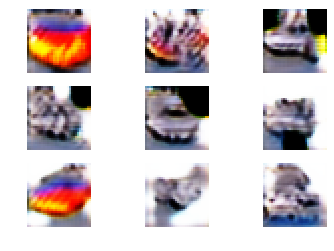

########################################
Epoch : 6
Time_taken : 11.672101974487305s, Generator Loss : 1.318899134818751 Discriminator Loss: 0.5297598716540214
########################################
Epoch : 7
Time_taken : 11.722235202789307s, Generator Loss : 1.2598198731549275 Discriminator Loss: 0.6176994030292218
########################################
Epoch : 8
Time_taken : 11.634818077087402s, Generator Loss : 1.257798151089213 Discriminator Loss: 0.6521632854755108
########################################
Epoch : 9
Time_taken : 11.633453130722046s, Generator Loss : 1.236526142519254 Discriminator Loss: 0.6122583242563101
########################################
Epoch : 10
Time_taken : 11.607157945632935s, Generator Loss : 1.2141970315804849 Discriminator Loss: 0.6434496366060697


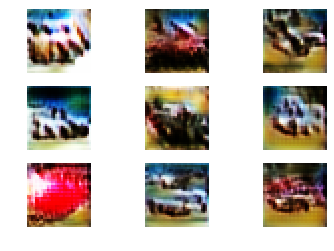

########################################
Epoch : 11
Time_taken : 11.6304931640625s, Generator Loss : 1.2036558499512 Discriminator Loss: 0.6325598496657151
########################################
Epoch : 12
Time_taken : 11.590479373931885s, Generator Loss : 1.1899340861500838 Discriminator Loss: 0.6645485804631159
########################################
Epoch : 13
Time_taken : 11.642754077911377s, Generator Loss : 1.0900291724082751 Discriminator Loss: 0.6594140957563351
########################################
Epoch : 14
Time_taken : 11.628446102142334s, Generator Loss : 1.083556160903894 Discriminator Loss: 0.6723848489614633
########################################
Epoch : 15
Time_taken : 11.640011310577393s, Generator Loss : 1.0091819041050398 Discriminator Loss: 0.6632408728966346


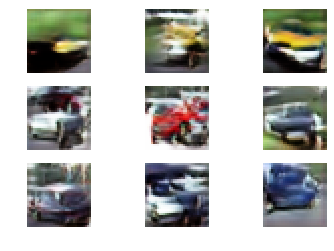

########################################
Epoch : 16
Time_taken : 11.590332508087158s, Generator Loss : 1.0429082959890366 Discriminator Loss: 0.6717210916372446
########################################
Epoch : 17
Time_taken : 11.608519792556763s, Generator Loss : 0.9999320627405093 Discriminator Loss: 0.6771243657821264
########################################
Epoch : 18
Time_taken : 11.595336675643921s, Generator Loss : 1.0273815542459488 Discriminator Loss: 0.6751003754444611
########################################
Epoch : 19
Time_taken : 11.638889074325562s, Generator Loss : 0.9692616928846408 Discriminator Loss: 0.7083557813595502
########################################
Epoch : 20
Time_taken : 11.577330112457275s, Generator Loss : 0.9939972343735206 Discriminator Loss: 0.6665427868182843


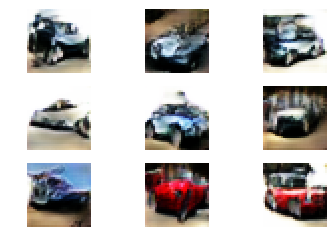

########################################
Epoch : 21
Time_taken : 11.615013837814331s, Generator Loss : 1.0004561910262475 Discriminator Loss: 0.6616235879751352
########################################
Epoch : 22
Time_taken : 11.833172082901001s, Generator Loss : 1.701073299615811 Discriminator Loss: 0.3918278767512395
########################################
Epoch : 23
Time_taken : 11.645793676376343s, Generator Loss : 1.450598548238094 Discriminator Loss: 0.32118728833320814
########################################
Epoch : 24
Time_taken : 11.665667295455933s, Generator Loss : 2.104790202652415 Discriminator Loss: 0.28287613697541064
########################################
Epoch : 25
Time_taken : 11.611536026000977s, Generator Loss : 1.8067825899865382 Discriminator Loss: 0.30983829498291016


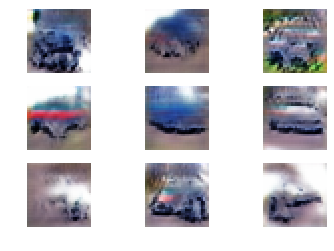

########################################
Epoch : 26
Time_taken : 11.579818964004517s, Generator Loss : 2.1535241910471368 Discriminator Loss: 0.30917869470058346
########################################
Epoch : 27
Time_taken : 11.545709371566772s, Generator Loss : 2.3014058257715826 Discriminator Loss: 0.3005353487454928
########################################
Epoch : 28
Time_taken : 11.556035041809082s, Generator Loss : 2.3164412264640513 Discriminator Loss: 0.3135033631936098
########################################
Epoch : 29
Time_taken : 12.127198696136475s, Generator Loss : 2.1281455175425763 Discriminator Loss: 0.34533358842898637
########################################
Epoch : 30
Time_taken : 11.570711612701416s, Generator Loss : 2.0577310476547632 Discriminator Loss: 0.3512578621888772


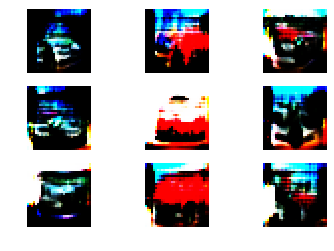

########################################
Epoch : 31
Time_taken : 11.6269052028656s, Generator Loss : 2.01223286986351 Discriminator Loss: 0.37030794681646884
########################################
Epoch : 32
Time_taken : 11.600627660751343s, Generator Loss : 1.8324717867832918 Discriminator Loss: 0.425880383222531
########################################
Epoch : 33
Time_taken : 11.604451417922974s, Generator Loss : 2.2391654026622954 Discriminator Loss: 0.31070736127021986
########################################
Epoch : 34
Time_taken : 11.641646146774292s, Generator Loss : 1.8709865104024992 Discriminator Loss: 0.45043500264485675
########################################
Epoch : 35
Time_taken : 11.590830326080322s, Generator Loss : 1.9298889570129223 Discriminator Loss: 0.3452342106745793


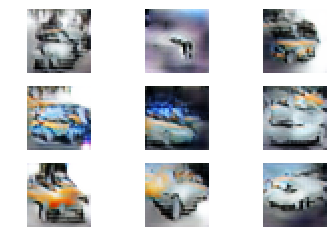

########################################
Epoch : 36
Time_taken : 11.531599283218384s, Generator Loss : 1.7462189421057701 Discriminator Loss: 0.39274880824944913
########################################
Epoch : 37
Time_taken : 11.542897701263428s, Generator Loss : 1.7675123285406675 Discriminator Loss: 0.47839839641864484
########################################
Epoch : 38
Time_taken : 11.591727256774902s, Generator Loss : 1.5446350605059893 Discriminator Loss: 0.5038252610426682
########################################
Epoch : 39
Time_taken : 11.653901100158691s, Generator Loss : 1.463826177211908 Discriminator Loss: 0.536551255446214
########################################
Epoch : 40
Time_taken : 11.536824464797974s, Generator Loss : 1.4270262606441975 Discriminator Loss: 0.5256137847900391


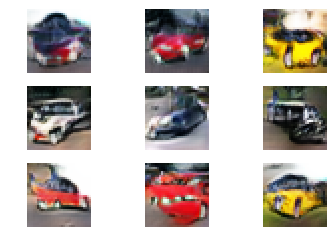

In [7]:
import time
N_EPOCHS = 40

for epoch in range(N_EPOCHS):
    cum_d_loss = 0.
    cum_g_loss = 0.
    
    start = time.time()
    
    for batch_idx in range(num_batches):
        # Get the next set of real images to be used in this iteration
        images = X_train[batch_idx * BATCH_SIZE : (batch_idx + 1) * BATCH_SIZE]
        
        noise_data = generate_noise(BATCH_SIZE, 100)
        
        generated_images = generator.predict(noise_data)
        
        # Train on soft labels and add noise to labels
        noise_prop = 0.05 # Randomly flip 5% of labels
        
        # Prepare labels for real data
        true_labels = np.zeros((BATCH_SIZE, 1)) + np.random.uniform(low = 0.0, high = 0.1, size = (BATCH_SIZE, 1))
        
        flipped_idx = np.random.choice(np.arange(len(true_labels)), size = int(noise_prop * len(true_labels)))
        true_labels[flipped_idx] = 1 - true_labels[flipped_idx]
        
        # Train discriminator on real data
        d_loss_true =  discriminator.train_on_batch(images, true_labels)
        
        # Prepare labels for generated data
        gene_labels = np.ones((BATCH_SIZE, 1)) - np.random.uniform(low = 0.0, high = 0.1, size = (BATCH_SIZE, 1))
        flipped_idx = np.random.choice(np.arange(len(gene_labels)), size = int(noise_prop * len(gene_labels)))
        gene_labels[flipped_idx] = 1 - gene_labels[flipped_idx]
        
        # Train discriminator on generated data
        d_loss_gene = discriminator.train_on_batch(generated_images, gene_labels)
        
        d_loss = 0.5 * np.add(d_loss_true, d_loss_gene)
        cum_d_loss += d_loss
        
        # Train generator
        noise_data = generate_noise(BATCH_SIZE, 100)
        g_loss = gan.train_on_batch(noise_data, np.zeros((BATCH_SIZE, 1)))
        cum_g_loss += g_loss
    
    end = time.time()
    print("########################################")
    print("Epoch : {}".format(epoch + 1))
    print("Time_taken : {}s, Generator Loss : {} Discriminator Loss: {}".format((end-start),
                                                                        cum_g_loss / num_batches,
                                                                        cum_d_loss[0] / num_batches))
        
    if (epoch+1) % 5 == 0:
        show_imgs("Epoch" + str(epoch))